In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# I want 7 days of 24 hours with 60 minutes each
periods = 7 * 24 * 60
tidx = pd.date_range('2018-11-01', periods=periods, freq='T')
tidx

DatetimeIndex(['2018-11-01 00:00:00', '2018-11-01 00:01:00',
               '2018-11-01 00:02:00', '2018-11-01 00:03:00',
               '2018-11-01 00:04:00', '2018-11-01 00:05:00',
               '2018-11-01 00:06:00', '2018-11-01 00:07:00',
               '2018-11-01 00:08:00', '2018-11-01 00:09:00',
               ...
               '2018-11-07 23:50:00', '2018-11-07 23:51:00',
               '2018-11-07 23:52:00', '2018-11-07 23:53:00',
               '2018-11-07 23:54:00', '2018-11-07 23:55:00',
               '2018-11-07 23:56:00', '2018-11-07 23:57:00',
               '2018-11-07 23:58:00', '2018-11-07 23:59:00'],
              dtype='datetime64[ns]', length=10080, freq='T')

In [8]:
data = np.random.randn(periods)
ts = pd.Series(data=data, index=tidx, name="helloTimeSeries")
ts.head()

2018-11-01 00:00:00    0.274588
2018-11-01 00:01:00   -0.239584
2018-11-01 00:02:00    0.699271
2018-11-01 00:03:00    0.690218
2018-11-01 00:04:00    0.573172
Freq: T, Name: helloTimeSeries, dtype: float64

In [9]:
ts.describe()

count    10080.000000
mean         0.005356
std          1.008169
min         -4.483725
25%         -0.659287
50%          0.017527
75%          0.677057
max          4.176797
Name: helloTimeSeries, dtype: float64

In [12]:
#group by every 15 mins row
ts.resample('15T').last()

2018-11-01 00:00:00    1.242147
2018-11-01 00:15:00    0.855885
2018-11-01 00:30:00    0.950188
2018-11-01 00:45:00   -1.346443
2018-11-01 01:00:00    2.130617
2018-11-01 01:15:00   -0.156700
2018-11-01 01:30:00    1.279380
2018-11-01 01:45:00    0.129296
2018-11-01 02:00:00   -0.200145
2018-11-01 02:15:00    1.340677
2018-11-01 02:30:00   -0.780040
2018-11-01 02:45:00   -0.298996
2018-11-01 03:00:00   -0.463927
2018-11-01 03:15:00   -0.635049
2018-11-01 03:30:00    1.179164
2018-11-01 03:45:00    0.317112
2018-11-01 04:00:00   -0.610858
2018-11-01 04:15:00    1.546626
2018-11-01 04:30:00   -1.075986
2018-11-01 04:45:00   -0.343377
2018-11-01 05:00:00    0.545970
2018-11-01 05:15:00   -0.600196
2018-11-01 05:30:00    0.000832
2018-11-01 05:45:00    0.677039
2018-11-01 06:00:00   -0.030938
2018-11-01 06:15:00   -1.688760
2018-11-01 06:30:00    0.068862
2018-11-01 06:45:00   -0.863333
2018-11-01 07:00:00   -1.447723
2018-11-01 07:15:00   -0.105404
                         ...   
2018-11-

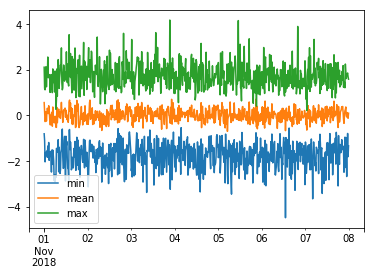

In [13]:
ts.resample('15T').agg(['min','mean','max']).plot()

In [14]:
##chapter 2: holiday Calendars:

#1 create a custom calendar:

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, EasterMonday, Easter
from pandas.tseries.offsets import Day, CustomBusinessDay

class FrBusinessCalendar(AbstractHolidayCalendar):
    """ Custom Holiday calendar for France based on
        https://en.wikipedia.org/wiki/Public_holidays_in_France
      - 1 January: New Year's Day
      - Moveable: Easter Monday (Monday after Easter Sunday)
      - 1 May: Labour Day
      - 8 May: Victory in Europe Day
      - Moveable Ascension Day (Thursday, 39 days after Easter Sunday)
      - 14 July: Bastille Day
      - 15 August: Assumption of Mary to Heaven
      - 1 November: All Saints' Day
      - 11 November: Armistice Day
      - 25 December: Christmas Day
    """
    rules = [
        Holiday('New Years Day', month=1, day=1),
        EasterMonday,
        Holiday('Labour Day', month=5, day=1),
        Holiday('Victory in Europe Day', month=5, day=8),
        Holiday('Ascension Day', month=1, day=1, offset=[Easter(), Day(39)]),
        Holiday('Bastille Day', month=7, day=14),
        Holiday('Assumption of Mary to Heaven', month=8, day=15),
        Holiday('All Saints Day', month=11, day=1),
        Holiday('Armistice Day', month=11, day=11),
        Holiday('Christmas Day', month=12, day=25)
    ]
    

In [15]:
from datetime import date

# Creating some boundaries
year = 2016
start = date(year, 1, 1)
end = start + pd.offsets.MonthEnd(12)

# Creating a custom calendar
cal = FrBusinessCalendar()
# Getting the holidays (off-days) between two dates
cal.holidays(start=start, end=end)

# DatetimeIndex(['2016-01-01', '2016-03-28', '2016-05-01', '2016-05-05',
#                '2016-05-08', '2016-07-14', '2016-08-15', '2016-11-01',
#                '2016-11-11', '2016-12-25'],
#               dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2016-01-01', '2016-03-28', '2016-05-01', '2016-05-05',
               '2016-05-08', '2016-07-14', '2016-08-15', '2016-11-01',
               '2016-11-11', '2016-12-25'],
              dtype='datetime64[ns]', freq=None)

In [16]:
from pandas.tseries.offsets import CDay

# Creating a series of dates between the boundaries 
# by using the custom calendar
se = pd.bdate_range(start=start, 
                    end=end,
                    freq=CDay(calendar=cal)).to_series()
# Counting the number of working days by month
se.groupby(se.dt.month).count().head()

1    20
2    21
3    22
4    21
5    21
dtype: int64

In [17]:
#chapter 3: Indexing and selecting data:
#1 Boolean indexing:

np.random.seed(5)
df = pd.DataFrame(np.random.randint(100, size=(5, 5)), columns = list("ABCDE"), 
                  index = ["R" + str(i) for i in range(5)])

df

,A,B,C,D,E
R0,99,78,61,16,73
R1,8,62,27,30,80
R2,7,76,15,53,80
R3,27,44,77,75,65
R4,47,30,84,86,18


In [18]:
mask = df['A'] > 10
mask

R0     True
R1    False
R2    False
R3     True
R4     True
Name: A, dtype: bool

In [19]:
df.loc[mask, 'C']

R0    61
R3    77
R4    84
Name: C, dtype: int32

In [20]:
df.loc[mask, ['C','D']]

,C,D
R0,61,16
R3,77,75
R4,84,86


In [23]:
#2 filter missing rows with missing data ( NaN, None, NaT)

df = pd.DataFrame([[0,1,2,3],
                  [None,5,None,pd.NaT],
                  [8,None,10,None],
                  [11,12,13,pd.NaT]],columns=list('ABCD'))

df

,A,B,C,D
0,0.0,1.0,2.0,3
1,NaN,5.0,NaN,NaT
2,8.0,NaN,10.0,None
3,11.0,12.0,13.0,NaT


In [27]:
df.dropna(inplace=True)
df

,A,B,C,D
0,0.0,1.0,2.0,3


In [29]:
df.dropna( subset=['C']) #only for C columns

,A,B,C,D
0,0.0,1.0,2.0,3


In [36]:
#3 filtering or selecting rows using .query() method:
df = pd.DataFrame(np.random.randint(0,10,size=(10, 3)), columns=list('ABC'))

df

,A,B,C
0,8,8,1
1,6,3,4
2,1,8,0
3,2,2,4
4,1,6,3
5,4,3,1
6,4,2,3
7,4,9,4
8,0,6,6
9,9,2,9


In [37]:
#select rows where values in col A > 2 and values in col B < 5

df.query( 'A > 2 and B > 5')

,A,B,C
0,8,8,1
7,4,9,4


In [42]:
# using .query() method with variables for filtering

B_filter = [2,4]
df.query('B == @B_filter')

,A,B,C
3,2,2,4
6,4,2,3
9,9,2,9


In [43]:
# usage in
df.query('@B_filter in B')

,A,B,C
3,2,2,4
6,4,2,3
9,9,2,9


In [44]:
#4 filter columns: selecting interesting, dropping unneeded, using RegEx

df = pd.DataFrame(np.random.randint(0, 10, size=(5, 6)), columns=['a10','a20','a25','b','c','d'])
df

,a10,a20,a25,b,c,d
0,3,0,8,8,9,7
1,4,8,6,8,0,5
2,3,4,0,2,2,1
3,1,7,1,7,2,6
4,3,6,8,0,9,1


In [45]:
#show col containing letter 'a'
df.filter(like='a')

,a10,a20,a25
0,3,0,8
1,4,8,6
2,3,4,0
3,1,7,1
4,3,6,8


In [46]:
#show col usin RegEx filter ( b|c|d)
df.filter(regex='(b|c|d)')

,b,c,d
0,8,9,7
1,8,0,5
2,2,2,1
3,7,2,6
4,0,9,1


In [47]:
#show all cols except those beginning with 'a'
df.loc[:, ~df.columns.str.contains('^a')]

,b,c,d
0,8,9,7
1,8,0,5
2,2,2,1
3,7,2,6
4,0,9,1


In [49]:
# get first and last rows of df
df.head(5)
df.tail(5)

df[:5]
df[-5:]

,a10,a20,a25,b,c,d
0,3,0,8,8,9,7
1,4,8,6,8,0,5
2,3,4,0,2,2,1
3,1,7,1,7,2,6
4,3,6,8,0,9,1


In [51]:
#Mixed position and label based selection:

np.random.seed(5)
df = pd.DataFrame(np.random.randint(100, size=(5, 5)), columns = list("ABCDE"), 
                  index = ["R" + str(i) for i in range(5)])
df

,A,B,C,D,E
R0,99,78,61,16,73
R1,8,62,27,30,80
R2,7,76,15,53,80
R3,27,44,77,75,65
R4,47,30,84,86,18


#chapter 5: path dependent slicing. <br>
It may become necessary to traverse the elements of a series or the rows of a dataframe in a way that the next element or next row is dependent on the previously selected element or row. This is called path dependency.

In [54]:
# n is number of observations
n = 5000

day = pd.to_datetime(['2013-02-06'])
# irregular seconds spanning 28800 seconds (8 hours)
seconds = np.random.rand(n) * 28800 * pd.Timedelta(1, 's')


# start at 8 am
start = pd.offsets.Hour(8)
# irregular timeseries
tidx = day + start + seconds
tidx = tidx.sort_values()

In [57]:
s = pd.Series(np.random.randn(n), tidx, name='A').cumsum()
s.head()

2013-02-06 08:00:11.027357783    0.136105
2013-02-06 08:00:13.831010223    1.720100
2013-02-06 08:00:14.119381714    2.225463
2013-02-06 08:00:19.669332840    1.176521
2013-02-06 08:00:31.444895940    1.123107
Name: A, dtype: float64

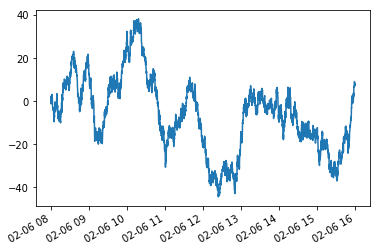

In [58]:
s.plot()

In [59]:
#chapter 6: select by position: using iloc or index location

df = pd.DataFrame([[11, 22], [33, 44], [55, 66]], index=list("abc"))

df.iloc[0]

0    11
1    22
Name: a, dtype: int64

In [60]:
df.iloc[:2]

,0,1
a,11,22
b,33,44


In [64]:
df[::-1]

,0,1
c,55,66
b,33,44
a,11,22


In [65]:
#chapter 7: select columns by label:

df = pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))
df.head()

,A,B,C
0,-0.234047,0.864702,-1.080918
1,1.221483,-0.677015,2.000544
2,2.572259,1.495549,-0.184868
3,-0.831330,0.670668,1.545933
4,0.285463,1.292030,0.324263


In [66]:
df['A']

0   -0.234047
1    1.221483
2    2.572259
3   -0.831330
4    0.285463
Name: A, dtype: float64

In [67]:
df[['A','C']]

,A,C
0,-0.234047,-1.080918
1,1.221483,2.000544
2,2.572259,-0.184868
3,-0.831330,1.545933
4,0.285463,0.324263


In [68]:
#chapter 8: select distinct rows across df;
df = pd.DataFrame({'col_1':['A','B','A','B','C'], 'col_2':[3,4,3,5,6]})
df

,col_1,col_2
0,A,3
1,B,4
2,A,3
3,B,5
4,C,6


In [69]:
df['col_1'].unique()  #works for single col

array(['A', 'B', 'C'], dtype=object)

In [70]:
#for multiple col's
df.drop_duplicates()

,col_1,col_2
0,A,3
1,B,4
3,B,5
4,C,6


In [71]:
df = pd.DataFrame({'col_1':['A','B','A','B','C'], 'col_2':[3,4,3,5,6], 'col_3':[0,0.1,0.2,0.3,0.4]})
df

,col_1,col_2,col_3
0,A,3,0.0
1,B,4,0.1
2,A,3,0.2
3,B,5,0.3
4,C,6,0.4


In [72]:
df.drop_duplicates()

,col_1,col_2,col_3
0,A,3,0.0
1,B,4,0.1
2,A,3,0.2
3,B,5,0.3
4,C,6,0.4


In [74]:
#slcing with labels:

np.random.seed(5)
df = pd.DataFrame(np.random.randint(100, size=(5, 5)), columns = list("ABCDE"), 
                  index = ["R" + str(i) for i in range(5)])
df.head()

,A,B,C,D,E
R0,99,78,61,16,73
R1,8,62,27,30,80
R2,7,76,15,53,80
R3,27,44,77,75,65
R4,47,30,84,86,18


In [75]:
df.loc['R0':'R2']

,A,B,C,D,E
R0,99,78,61,16,73
R1,8,62,27,30,80
R2,7,76,15,53,80


In [76]:
df.iloc[0:2]

,A,B,C,D,E
R0,99,78,61,16,73
R1,8,62,27,30,80


In [77]:
df.loc[:, 'C':'E']

,C,D,E
R0,61,16,73
R1,27,30,80
R2,15,53,80
R3,77,75,65
R4,84,86,18


In [78]:
#chapter 8: reading JSON files:
# pd.read_json("filename", lines=True)

In [79]:
#chapter 9: convert df to python data structures:

df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 'C': ['a', 'b', 'c'], 
                       'D': [True, False, True]})

df['A'].tolist()

[1, 2, 3]

In [80]:
df['B'].values

array([1., 2., 3.])

In [81]:
df.values

array([[1, 1.0, 'a', True],
       [2, 2.0, 'b', False],
       [3, 3.0, 'c', True]], dtype=object)

In [82]:
df['C'].to_dict()

{0: 'a', 1: 'b', 2: 'c'}

In [83]:
df.to_dict()

{'A': {0: 1, 1: 2, 2: 3},
 'B': {0: 1.0, 1: 2.0, 2: 3.0},
 'C': {0: 'a', 1: 'b', 2: 'c'},
 'D': {0: True, 1: False, 2: True}}

In [84]:
df.to_dict('records')

[{'A': 1, 'B': 1.0, 'C': 'a', 'D': True},
 {'A': 2, 'B': 2.0, 'C': 'b', 'D': False},
 {'A': 3, 'B': 3.0, 'C': 'c', 'D': True}]

#chapter 9: Map values: <br>
it should be mentioned that if the key value does not exist then this will raise KeyError, in those situations it maybe better to use merge or get which allows you to specify a default value if the key doesn't exist


In [92]:
#chapter 9: Merging and joining

In [93]:
df3 = pd.DataFrame({'col1':[211,212,213], 'col2': [221,222,223]})
df1 = pd.DataFrame({'col1':[11,12,13], 'col2': [21,22,23]})
df2 = pd.DataFrame({'col1':[111,112,113], 'col2': [121,122,123]})
df3 = pd.DataFrame({'col1':[211,212,213], 'col2': [221,222,223]})


In [94]:
df1

,col1,col2
0,11,21
1,12,22
2,13,23


In [95]:
df2

,col1,col2
0,111,121
1,112,122
2,113,123


In [96]:
df3

,col1,col2
0,211,221
1,212,222
2,213,223


In [97]:
#add vertically
pd.concat([df1,df2,df3], ignore_index= True)

,col1,col2
0,11,21
1,12,22
2,13,23
3,111,121
4,112,122
5,113,123
6,211,221
7,212,222
8,213,223


In [98]:
#add horizontally
pd.concat([df1,df2,df3], axis=1)

,col1,col2,col1,col2,col1,col2
0,11,21,111,121,211,221
1,12,22,112,122,212,222
2,13,23,113,123,213,223


In [102]:
#merging two columns;
df1 = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})
df2 = pd.DataFrame({'y': ['b', 'c', 'd'], 'z': [4, 5, 6]})
df1



,x,y
0,1,a
1,2,b
2,3,c


In [103]:
df2

,y,z
0,b,4
1,c,5
2,d,6


In [105]:
#Inner join: intersection
df1.merge(df2) #default: inner join

,x,y,z
0,2,b,4
1,3,c,5


In [106]:
#method 2: 
merged_inner = pd.merge(left=df1, right=df2, left_on='y', right_on='y')

In [107]:
#outer join: union of the keys from two df;
df1.merge(df2, how='outer')

,x,y,z
0,1.0,a,NaN
1,2.0,b,4.0
2,3.0,c,5.0
3,NaN,d,6.0


In [108]:
#left join: Uses only keys from left df
df1.merge(df2, how='left')

,x,y,z
0,1,a,NaN
1,2,b,4.0
2,3,c,5.0


In [4]:
#checking for missing values:
ser = pd.Series([1, 2, np.nan, 4])

pd.isnull(ser) ##use this

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
ser == np.nan

0    False
1    False
2    False
3    False
dtype: bool

In [6]:
#testing df;
df = pd.DataFrame({'A': [1, np.nan, 3], 'B': [np.nan, 5, 6]})
df

,A,B
0,1.0,NaN
1,NaN,5.0
2,3.0,6.0


In [8]:
df.isnull() #if null, return True

,A,B
0,False,True
1,True,False
2,False,False


In [10]:
df.notnull() #opposite to .isnull()

,A,B
0,True,False
1,False,True
2,True,True


In [12]:
#Drop missing value's

df = pd.DataFrame([[1, 2, None, 3], [4, None, 5, 6], [7, 8, 9, 10], [None, None, None, None]])
df

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [13]:
#drop rows if at least one coumn has a missing value
df.dropna()

,0,1,2,3
2,7.0,8.0,9.0,10.0


In [14]:
#Drop if all values in that row are missing;
df.dropna(how='all')

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0


In [15]:
#drop columns that don't have at least 3 non-missing values;
df.dropna(axis=1, thresh=3)

,0,3
0,1.0,3.0
1,4.0,6.0
2,7.0,10.0
3,NaN,NaN


In [16]:
#Fulling missing values:
df = pd.DataFrame([[1, 2, None, 3], [4, None, 5, 6], [7, 8, 9, 10], [None, None, None, None]])
df

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [18]:
df.fillna(0) #fill zero

,0,1,2,3
0,1.0,2.0,0.0,3.0
1,4.0,0.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,0.0,0.0,0.0,0.0


In [19]:
#fill missing values with the previous ones:
df.fillna(method='pad') # same as method='ffill' and .ffill()

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,2.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,7.0,8.0,9.0,10.0


In [20]:
#fill with the next one;
df.fillna(method='bfill') # same as .bfill()

,0,1,2,3
0,1.0,2.0,5.0,3.0
1,4.0,8.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [21]:
#Fill using another df; 
df2 = pd.DataFrame(np.arange(100, 116).reshape(4, 4))
df2

,0,1,2,3
0,100,101,102,103
1,104,105,106,107
2,108,109,110,111
3,112,113,114,115


In [22]:
df.fillna(df2) ## assign corresponding cells in df2 to till df

,0,1,2,3
0,1.0,2.0,102.0,3.0
1,4.0,105.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,112.0,113.0,114.0,115.0


In [23]:
#Interpolations:
df = pd.DataFrame({'A':[1,2,np.nan,3,np.nan], 'B':[1.2,7,3,0,8]})
df

,A,B
0,1.0,1.2
1,2.0,7.0
2,NaN,3.0
3,3.0,0.0
4,NaN,8.0


In [36]:
df['A'].interpolate()  #interpolate linear

0    1.0
1    2.0
2    2.5
3    3.0
4    3.0
Name: A, dtype: float64

In [42]:
df.interpolate()


,A,B
0,1.0,1.2
1,2.0,7.0
2,2.5,3.0
3,3.0,0.0
4,3.0,8.0


In [58]:
#MultiIndex: 

value = [1,2,3,4]
value1 =  [ 3,2,4,5]
df = pd.DataFrame({'A':value, 'B': value1 } )


pd.set_option('display.multi_sparse', False)

list( df.groupby(['A','B']) )


[((1, 3),    A  B
  0  1  3), ((2, 2),    A  B
  1  2  2), ((3, 4),    A  B
  2  3  4), ((4, 5),    A  B
  3  4  5)]

In [59]:
# How to change MultiIndex columns into std columns;
midx = pd.MultiIndex(levels=[['zero', 'one'], ['x','y']], labels=[[1,1,0,],[1,0,1,]])
df = pd.DataFrame(np.random.randn(2,3), columns=midx)
df

,one,one,zero
,y,x,y
0,-0.641992,0.883039,1.854736
1,-2.023961,-0.171546,-0.368058


In [61]:
#change columns into standard columns ( not MultiIndex )
df.columns = ['A','B','C']
df

,A,B,C
0,-0.641992,0.883039,1.854736
1,-2.023961,-0.171546,-0.368058


In [62]:
#How to change standard columns to MultiIndex;
df = pd.DataFrame(np.random.randn(2,3), columns=['a','b','c'])
df

,a,b,c
0,1.368030,0.341936,0.750851
1,-2.338817,0.747231,-0.557771


In [63]:
midx = pd.MultiIndex(levels=[['zero', 'one'], ['x','y']], labels=[[1,1,0,],[1,0,1,]])
midx

MultiIndex(levels=[['zero', 'one'], ['x', 'y']],
           labels=[[1, 1, 0], [1, 0, 1]])

In [65]:
df.columns = midx
df

,one,one,zero
,y,x,y
0,1.368030,0.341936,0.750851
1,-2.338817,0.747231,-0.557771


In [66]:
#Iterate over df with MultiIndex;
df = pd.DataFrame({'a':[1,1,1,2,2,3],'b':[4,4,5,5,6,7,],'c':[10,11,12,13,14,15]})
df

,a,b,c
0,1,4,10
1,1,4,11
2,1,5,12
3,2,5,13
4,2,6,14
5,3,7,15


In [67]:
df.set_index(['a','b'], inplace=True)
df

,,c
a,b,
1,4,10
1,4,11
1,5,12
2,5,13
2,6,14
3,7,15


In [68]:
for idx,data in df.groupby(level=0):  #level='a'
    print('------')
    print(data)
    

------
      c
a b    
1 4  10
1 4  11
1 5  12
------
      c
a b    
2 5  13
2 6  14
------
      c
a b    
3 7  15


In [69]:
for idx,data in df.groupby(level='b'):
    print('---')
    print(data)

---
      c
a b    
1 4  10
1 4  11
---
      c
a b    
1 5  12
2 5  13
---
      c
a b    
2 6  14
---
      c
a b    
3 7  15


In [76]:
#MulitIndex columns;
# select from MultiIndex by Level;
df = pd.DataFrame(np.random.randn(6, 3), columns=['A', 'B', 'C'])
df.set_index(['A', 'B'], inplace=True)

df

,,C
A,B,
-0.345205,0.124216,-1.060100
0.312713,0.514534,0.121591
-0.329648,0.156785,-0.717977
0.973700,-1.451670,0.648885
1.507815,0.020704,0.445906
0.341506,0.451450,-0.828265


In [78]:
#get Index values
df.index.get_level_values('A')

Float64Index([-0.3452049145141033,  0.3127133477577633, -0.3296478366451554,
               0.9737000040534441,  1.5078147186533422,  0.3415064800172264],
             dtype='float64', name='A')

In [79]:
#Or by value
df.index.get_level_values(level=0)

Float64Index([-0.3452049145141033,  0.3127133477577633, -0.3296478366451554,
               0.9737000040534441,  1.5078147186533422,  0.3415064800172264],
             dtype='float64', name='A')

In [80]:
#for specific range;
df.loc[( df.index.get_level_values('A') > 0.5) & (df.index.get_level_values('A') < 2.1 )]
df

,,C
A,B,
-0.345205,0.124216,-1.060100
0.312713,0.514534,0.121591
-0.329648,0.156785,-0.717977
0.973700,-1.451670,0.648885
1.507815,0.020704,0.445906
0.341506,0.451450,-0.828265


In [81]:
#multiple columns:
df.loc[( df.index.get_level_values('A') > 0.5 ) & ( df.index.get_level_values('B') < 0)]

,,C
A,B,
0.9737,-1.45167,0.648885


In [85]:
#Setting and sorting a MultiIndex;

df = pd.DataFrame([['one', 'A', 100], ['two', 'A', 101], ['three', 'A', 102], ['one', 'B', 103], ['two', 'B', 104], ['three', 'B', 105]],columns=['c1', 'c2', 'c3'])
df


,c1,c2,c3
0,one,A,100
1,two,A,101
2,three,A,102
3,one,B,103
4,two,B,104
5,three,B,105


In [86]:
df.set_index(['c1', 'c2'])

,,c3
c1,c2,
one,A,100
two,A,101
three,A,102
one,B,103
two,B,104
three,B,105


In [87]:
#sort index
df.set_index(['c1', 'c2']).sort_index()

,,c3
c1,c2,
one,A,100
one,B,103
three,A,102
three,B,105
two,A,101
two,B,104


In [88]:
#df apply:t to call functions

df = pd.DataFrame(np.random.randint(0,100,size = (7,2)), columns = ['fst','snd'])
df

,fst,snd
0,5,78
1,84,13
2,61,68
3,27,84
4,90,94
5,83,48
6,97,75


In [89]:
#applu sqrt function to each columns:
df.apply(np.sqrt)

,fst,snd
0,2.236068,8.831761
1,9.165151,3.605551
2,7.810250,8.246211
3,5.196152,9.165151
4,9.486833,9.695360
5,9.110434,6.928203
6,9.848858,8.660254


In [92]:
def extra_fun(a):
    return a * 2

df.apply( extra_fun)

,fst,snd
0,10,156
1,168,26
2,122,136
3,54,168
4,180,188
5,166,96
6,194,150


In [93]:
# read text file using read_table

pd.read_table('table.txt', delim_whitespace=True, skiprows=3, skip_footer=2, index_col=0 )

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,name,occupation
index,,
1,Alice,Salesman
2,Bob,Engineer
3,Charlie,Janitor


In [95]:
pd.read_table('table1.txt', delim_whitespace=True, names=['name','occupation'])


,name,occupation
0,Alice,Salesman
1,Bob,Engineer
2,Charlie,Janitor


In [96]:
#downsampling and upsampling;

np.random.seed(0)
rng = pd.date_range('2015-02-24', periods=10, freq='T')
df = pd.DataFrame({'Val' : np.random.randn(len(rng))}, index=rng) 
df.head()

,Val
2015-02-24 00:00:00,1.764052
2015-02-24 00:01:00,0.400157
2015-02-24 00:02:00,0.978738
2015-02-24 00:03:00,2.240893
2015-02-24 00:04:00,1.867558


In [97]:
print (df.resample('5Min').sum())

                          Val
2015-02-24 00:00:00  7.251399
2015-02-24 00:05:00  0.128833


In [99]:
print (df.resample('5T').sum())  # same as above

                          Val
2015-02-24 00:00:00  7.251399
2015-02-24 00:05:00  0.128833


In [100]:
print (df.resample('30S').ffill())  # upsampling and fill NaN values method forward filling;

                          Val
2015-02-24 00:00:00  1.764052
2015-02-24 00:00:30  1.764052
2015-02-24 00:01:00  0.400157
2015-02-24 00:01:30  0.400157
2015-02-24 00:02:00  0.978738
2015-02-24 00:02:30  0.978738
2015-02-24 00:03:00  2.240893
2015-02-24 00:03:30  2.240893
2015-02-24 00:04:00  1.867558
2015-02-24 00:04:30  1.867558
2015-02-24 00:05:00 -0.977278
2015-02-24 00:05:30 -0.977278
2015-02-24 00:06:00  0.950088
2015-02-24 00:06:30  0.950088
2015-02-24 00:07:00 -0.151357
2015-02-24 00:07:30 -0.151357
2015-02-24 00:08:00 -0.103219
2015-02-24 00:08:30 -0.103219
2015-02-24 00:09:00  0.410599


In [2]:
#reshaping and pivoting;
df = pd.DataFrame({'Sex': ['M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F'], 'Age': [20, 19, 17, 35, 22, 22, 12, 15, 17, 22], 'Heart Disease': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y']})
df

,Age,Heart Disease,Sex
0,20,Y,M
1,19,N,M
2,17,Y,F
3,35,N,M
4,22,N,F
5,22,Y,F
6,12,N,M
7,15,Y,M
8,17,N,F
9,22,Y,F


In [104]:
pd.crosstab( df.Sex, df.Age) #observe

Age,12,15,17,19,20,22,35
Sex,,,,,,,
F,0,0,2,0,0,3,0
M,1,1,0,1,1,0,1


In [106]:
#transpose of DF
pd.crosstab(df.Sex, df.Age).T


Sex,F,M
Age,,
12,0,1
15,0,1
17,2,0
19,0,1
20,0,1
22,3,0
35,0,1


In [108]:
# getting margins;
pd.crosstab( df['Sex'], df['Heart Disease'] )

Heart Disease,N,Y
Sex,,
F,2,3
M,3,2


In [109]:
pd.crosstab(df['Sex'], df['Heart Disease'], margins=True) #All

Heart Disease,N,Y,All
Sex,,,
F,2,3,5
M,3,2,5
All,5,5,10


In [110]:
pd.crosstab(df['Sex'], df['Age'], margins=True).T

Sex,F,M,All
Age,,,
12,0,1,1
15,0,1,1
17,2,0,2
19,0,1,1
20,0,1,1
22,3,0,3
35,0,1,1
All,5,5,10


In [111]:
pd.crosstab( df['Sex'], df['Heart Disease']).apply( lambda r:r/len(df), axis=1)

Heart Disease,N,Y
Sex,,
F,0.2,0.3
M,0.3,0.2


In [3]:
#Melt: convert

data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [113]:
melted = pd.melt(df, id_vars=["weekday"], var_name="Person", value_name="Score")
melted

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


In [5]:
#Pivoting with aggregating;

df = pd.DataFrame({'Name':['Mary', 'Jon','Lucy', 'Jane', 'Sue', 'Mary', 'Lucy'],
                   'Age':[35, 37, 40, 29, 31, 26, 28],
                   'City':['Boston', 'Chicago', 'Los Angeles', 'Chicago', 'Boston', 'Boston', 'Chicago'],
                   'Position':['Manager','Manager','Manager','Programmer', 'Programmer','Manager','Manager'],
                    'Sex':['Female','Male','Female','Female', 'Female','Female','Female']},
                    columns=['Name','Position','City','Age','Sex'])
df  #observe: same name with different age

,Name,Position,City,Age,Sex
0,Mary,Manager,Boston,35,Female
1,Jon,Manager,Chicago,37,Male
2,Lucy,Manager,Los Angeles,40,Female
3,Jane,Programmer,Chicago,29,Female
4,Sue,Programmer,Boston,31,Female
5,Mary,Manager,Boston,26,Female
6,Lucy,Manager,Chicago,28,Female


In [6]:
print (df.pivot(index='Position', columns='City', values='Age')) #ERROR due to duplicate names

ValueError: Index contains duplicate entries, cannot reshape

In [117]:
df.pivot_table( index='Position', columns='City', values='Age')

City,Boston,Chicago,Los Angeles
Position,,,
Manager,30.5,32.5,40.0
Programmer,31.0,29.0,NaN


In [118]:
df.pivot_table(index='Position', columns='City', values='Age', aggfunc=np.mean)

City,Boston,Chicago,Los Angeles
Position,,,
Manager,30.5,32.5,40.0
Programmer,31.0,29.0,NaN


In [119]:
df.pivot_table(index='Position', columns='City', values='Age', aggfunc=sum)

City,Boston,Chicago,Los Angeles
Position,,,
Manager,61.0,65.0,40.0
Programmer,31.0,29.0,NaN


In [120]:
df.pivot_table(index='Position', columns='City', values='Age', aggfunc='first')

City,Boston,Chicago,Los Angeles
Position,,,
Manager,35.0,37.0,40.0
Programmer,31.0,29.0,NaN


In [122]:
df.pivot_table(index='Position', columns='City', values='Name') #ERROR: No numeric types to aggregate

DataError: No numeric types to aggregate

In [123]:
df.pivot_table(index='Position', columns='City', values='Name', aggfunc='first')

City,Boston,Chicago,Los Angeles
Position,,,
Manager,Mary,Jon,Lucy
Programmer,Sue,Jane,None


In [9]:
#Pivot: summarize( sort, count, total or avg ) the column;

In [11]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [15]:
#sort df by ascending years and descending happiness scores;
data.sort_values(['Year','Happiness Score'], ascending=[True,False], inplace=True)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [16]:
data.shape

(495, 12)

In [22]:
#are there any missing values
print ( data.isnull().any().any() )  ## this si True
data.describe()

True


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [25]:
#categorizing the data by year and Region;
pd.pivot_table(data, index='Year', values='Happiness Score') #takes avg per year

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [27]:
#lets use region columns;
pd.pivot_table(data, index='Region', values='Happiness Score')

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [28]:
#create multi-index pivot table:
pd.pivot_table(data, index=['Region', 'Year'], values='Happiness Score')


Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [29]:
##another way using 'columnns': 
pd.pivot_table(data,index='Region', columns='Year', values='Happiness Score')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


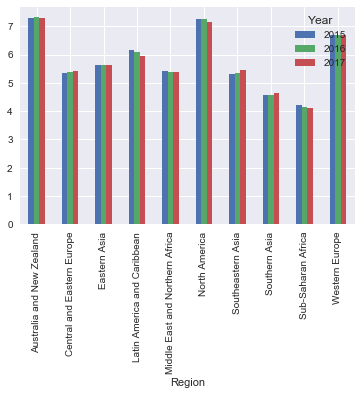

In [31]:
sns.set()
pd.pivot_table(data, index='Region', columns='Year', values='Happiness Score').plot(kind='bar')

In [32]:
#manipulating data using aggfunc

pd.pivot_table(data, index='Region', values='Happiness Score', aggfunc=[np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [33]:
#applying a custom function to remove outliers:
pd.pivot_table(data, index='Region', values='Happiness Score', aggfunc=[np.mean, min, max, np.std, lambda x:x.mean()/3 ])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.284,7.334,0.020936,2.434167
Central and Eastern Europe,5.371184,4.096,6.609,0.578274,1.790395
Eastern Asia,5.632333,4.874,6.422,0.502100,1.877444
Latin America and Caribbean,6.069074,3.603,7.226,0.728157,2.023025
Middle East and Northern Africa,5.387879,3.006,7.278,1.031656,1.795960
North America,7.227167,6.993,7.427,0.179331,2.409056
Southeastern Asia,5.364077,3.819,6.798,0.882637,1.788026
Southern Asia,4.590857,3.360,5.269,0.535978,1.530286


In [36]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index = 'Region', values="Happiness Score",aggfunc= [np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


In [38]:
#let see the results of Europe;
table = pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers])

table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [39]:
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


In [40]:
# Extract specific values from more than one column, use df.query()
table = pd.pivot_table(data, index = ['Region', 'Year'], values='Happiness Score',
               aggfunc= [np.mean, remove_outliers])
table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

In [41]:
#simple pivot
df = pd.DataFrame({'Name':['Mary', 'Josh','Jon','Lucy', 'Jane', 'Sue'],
                   'Age':[34, 37, 29, 40, 29, 31],
                   'City':['Boston','New York', 'Chicago', 'Los Angeles', 'Chicago', 'Boston'],
                   'Position':['Manager','Programmer','Manager','Manager','Programmer', 'Programmer']},
                    columns=['Name','Position','City','Age'])

df.head()

,Name,Position,City,Age
0,Mary,Manager,Boston,34
1,Josh,Programmer,New York,37
2,Jon,Manager,Chicago,29
3,Lucy,Manager,Los Angeles,40
4,Jane,Programmer,Chicago,29


In [42]:
#pivoting by numbers - column Age:
df.pivot(index='Position', columns='City', values='Age').reset_index().rename_axis(None,axis=1).fillna(0)

,Position,Boston,Chicago,Los Angeles,New York
0,Manager,34.0,29.0,40.0,0.0
1,Programmer,31.0,29.0,0.0,37.0


In [43]:
##split ( reshape ) CSV strings in columns into multiple rows, having one element per row:

df = pd.DataFrame([{'var1': 'a,b,c', 'var2': 1, 'var3': 'XX'}, {'var1': 'd,e,f,x,y', 'var2': 2, 'var3': 'ZZ'}])
df

,var1,var2,var3
0,"a,b,c",1,XX
1,"d,e,f,x,y",2,ZZ


In [45]:
reshaped = \
(df.set_index(df.columns.drop('var1',1).tolist())
   .var1.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'var1'})
   .loc[:, df.columns]
)
reshaped

,var1,var2,var3
0,a,1,XX
1,b,1,XX
2,c,1,XX
3,d,2,ZZ
4,e,2,ZZ
5,f,2,ZZ
6,x,2,ZZ
7,y,2,ZZ


In [46]:
#stacking unstacking:

np.random.seed(0)
tuples = list(zip(*[['bar', 'bar', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two']]))

idx = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(6, 2), index=idx, columns=['A', 'B'])
df.head()

A         B
first second                    
bar   one     1.764052  0.400157
      two     0.978738  2.240893
foo   one     1.867558 -0.977278
      two     0.950088 -0.151357
qux   one    -0.103219  0.410599

In [47]:
df.stack()

first  second   
bar    one     A    1.764052
               B    0.400157
       two     A    0.978738
               B    2.240893
foo    one     A    1.867558
               B   -0.977278
       two     A    0.950088
               B   -0.151357
qux    one     A   -0.103219
               B    0.410599
       two     A    0.144044
               B    1.454274
dtype: float64

In [48]:
df.stack().reset_index(name='val2').rename(columns={'level_2': 'val1'})

,first,second,val1,val2
0,bar,one,A,1.764052
1,bar,one,B,0.400157
2,bar,two,A,0.978738
3,bar,two,B,2.240893
4,foo,one,A,1.867558
5,foo,one,B,-0.977278
6,foo,two,A,0.950088
7,foo,two,B,-0.151357
8,qux,one,A,-0.103219
9,qux,one,B,0.410599


In [49]:
df.unstack()

A                   B          
second       one       two       one       two
first                                         
bar     1.764052  0.978738  0.400157  2.240893
foo     1.867558  0.950088 -0.977278 -0.151357
qux    -0.103219  0.144044  0.410599  1.454274

In [50]:
#reset index, remove columns names
df1 = df.unstack().reset_index().rename_axis((None,None), axis=1)
#reset MultiIndex in columns with list comprehension
df1.columns = ['_'.join(col).strip('_') for col in df1.columns]
df1

,first,A_one,A_two,B_one,B_two
0,bar,1.764052,0.978738,0.400157,2.240893
1,foo,1.867558,0.950088,-0.977278,-0.151357
2,qux,-0.103219,0.144044,0.410599,1.454274


In [51]:
#reset index
df1 = df.unstack().reset_index()
#remove columns names
df1.columns.names = (None, None)
#reset MultiIndex in columns with list comprehension
df1.columns = ['_'.join(col).strip('_') for col in df1.columns]
print (df1)

  first     A_one     A_two     B_one     B_two
0   bar  1.764052  0.978738  0.400157  2.240893
1   foo  1.867558  0.950088 -0.977278 -0.151357
2   qux -0.103219  0.144044  0.410599  1.454274


In [52]:
# Series: 
s = pd.Series([1, 4, 6, 3, 8, 7, 4, 5])
len(s)

8

In [53]:
s[4]

8

In [54]:
s.loc[2]

6

In [55]:
s[1:3]

1    4
2    6
dtype: int64

In [56]:
s[s>5]

2    6
4    8
5    7
dtype: int64

In [58]:
s.min()

1

In [60]:
s.max()
s.mean()

4.75

In [61]:
s.astype(float)

0    1.0
1    4.0
2    6.0
3    3.0
4    8.0
5    7.0
6    4.0
7    5.0
dtype: float64

In [62]:
d = s.copy()

In [63]:
def square(x):
    return x*x

t = s.apply(square)
t

0     1
1    16
2    36
3     9
4    64
5    49
6    16
7    25
dtype: int64

In [64]:
s.apply( lambda x:x ** 2)

0     1
1    16
2    36
3     9
4    64
5    49
6    16
7    25
dtype: int64

In [65]:
q = pd.Series([ 'Bob','Jack','Rose'])
q.apply(str.lower)

0     bob
1    jack
2    rose
dtype: object

In [66]:
q.str.lower()

0     bob
1    jack
2    rose
dtype: object

In [67]:
q.str.len()

0    3
1    4
2    4
dtype: int64

In [68]:
np.random.seed(0)
rng = pd.date_range('2015-02-24', periods=5, freq='T')
s = pd.Series(np.random.randn(len(rng)), index=rng) 
s

2015-02-24 00:00:00    1.764052
2015-02-24 00:01:00    0.400157
2015-02-24 00:02:00    0.978738
2015-02-24 00:03:00    2.240893
2015-02-24 00:04:00    1.867558
Freq: T, dtype: float64

In [69]:
rng = pd.date_range('2015-02-24', periods=5, freq='T')
s1 = pd.Series(rng)
s1

0   2015-02-24 00:00:00
1   2015-02-24 00:01:00
2   2015-02-24 00:02:00
3   2015-02-24 00:03:00
4   2015-02-24 00:04:00
dtype: datetime64[ns]

In [70]:
#shifting and lagging values in a df;
df = pd.DataFrame({'eggs': [1,2,4,8,], 'chickens': [0,1,2,4,]})
df

,chickens,eggs
0,0,1
1,1,2
2,2,4
3,4,8


In [71]:
df.shift()

,chickens,eggs
0,NaN,NaN
1,0.0,1.0
2,1.0,2.0
3,2.0,4.0


In [72]:
df.shift(-2)

,chickens,eggs
0,2.0,4.0
1,4.0,8.0
2,NaN,NaN
3,NaN,NaN


In [73]:
df['eggs'].shift(1) - df['chickens']

0    NaN
1    0.0
2    0.0
3    0.0
dtype: float64

In [74]:
#simple manipulations:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [75]:
#direct assign;
df['C'] = [7,8,9]
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [76]:
#add a constant columns:
df['C'] = 1
df

,A,B,C
0,1,4,1
1,2,5,1
2,3,6,1


In [77]:
#col as an expression in other col;
df['C'] = df['A'] + df['B']
df

,A,B,C
0,1,4,5
1,2,5,7
2,3,6,9


In [78]:
df['C'] = df['A'] ** df['B']
df

,A,B,C
0,1,4,1
1,2,5,32
2,3,6,729


In [80]:
a = [ 1,2,3]
b = [4,5,6]
c = [ x ** y for (x,y) in zip(a,b)]
c

[1, 32, 729]

In [81]:
#create it on the fly:
df_means = df.assign( D=[10,20,30]).mean()
df_means

A      2.0
B      5.0
C    254.0
D     20.0
dtype: float64

In [83]:
#add mulitple col's;
df = pd.DataFrame({ 'A': [1,2,3], 'B':[4,5,6]})
df[['A2','B2']] = np.square(df)
df

,A,B,A2,B2
0,1,4,1,16
1,2,5,4,25
2,3,6,9,36


In [85]:
#add multiple col's on the fly;
new_df = df.assign( A3=df.A * df.A2, B3=5 * df.B )
new_df

,A,B,A2,B2,A3,B3
0,1,4,1,16,1,20
1,2,5,4,25,8,25
2,3,6,9,36,27,30


In [86]:
s1 = pd.Series([1,2,3])
s2 = pd.Series(['a','b','c'])

df = pd.DataFrame( [ list(s1), list(s2) ], columns=['c1','c2','c3'])
df

,c1,c2,c3
0,1,2,3
1,a,b,c


In [88]:
#add new row:
df = pd.DataFrame( np.array([[10,11,12]]), columns=['c1','c2','c3']).append( df, ignore_index=True )
df

,c1,c2,c3
0,10,11,12
1,10,11,12
2,1,2,3
3,a,b,c


In [89]:
df = pd.DataFrame(np.arange(10).reshape(5,2), columns=list('ab'))
df

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [98]:
np.random.seed(0)

df = pd.DataFrame(np.random.randn(5, 6), columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278
1,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274
2,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158
3,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165
4,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359


In [101]:
#method 1
del df['A']

In [104]:
# using drop;
df = df.drop(['D','E'], axis = 1 )
df

""
0
1
2
3
4


In [105]:
#locate and replace data in a col's:
df = pd.DataFrame({'gender': ["male", "female","female"], 'id': [1, 2, 3] })
df

,gender,id
0,male,1
1,female,2
2,female,3


In [106]:
# encode male to 0 and female to 1
df.loc[ df['gender'] == 'male', 'gender'] = 0
df.loc[ df['gender'] == 'female', 'gender'] = 1
df

,gender,id
0,0,1
1,1,2
2,1,3


In [107]:
#re-name a column: 
df = pd.DataFrame({'old_name_1': [1, 2, 3], 'old_name_2': [5, 6, 7]})
df

,old_name_1,old_name_2
0,1,5
1,2,6
2,3,7


In [108]:
#method 1
df.rename(columns={'old_name_1': 'new_name_1', 'old_name_2': 'new_name_2'}, inplace=True)
df

,new_name_1,new_name_2
0,1,5
1,2,6
2,3,7


In [110]:
#method 2
df.rename(columns=lambda x: x.replace('old_', '_new'), inplace=True)
df

,new_name_1,new_name_2
0,1,5
1,2,6
2,3,7


In [111]:
#method 3: 
df.columns = [ 'new_name_1', 'new_name_2']
df

,new_name_1,new_name_2
0,1,5
1,2,6
2,3,7


In [114]:
#string manipulations:
ser = pd.Series(['lORem ipSuM', 'Dolor sit amet', 'Consectetur Adipiscing Elit'])
ser

0                    lORem ipSuM
1                 Dolor sit amet
2    Consectetur Adipiscing Elit
dtype: object

In [115]:
ser.str.upper()

0                    LOREM IPSUM
1                 DOLOR SIT AMET
2    CONSECTETUR ADIPISCING ELIT
dtype: object

In [116]:
ser.str.capitalize()

0                    Lorem ipsum
1                 Dolor sit amet
2    Consectetur adipiscing elit
dtype: object

In [117]:
ser.str.title()

0                    Lorem Ipsum
1                 Dolor Sit Amet
2    Consectetur Adipiscing Elit
dtype: object

In [118]:
ser.str.swapcase()

0                    LorEM IPsUm
1                 dOLOR SIT AMET
2    cONSECTETUR aDIPISCING eLIT
dtype: object

In [120]:
#check content of the content: str.contains(), str.startswith() and str.endswith()
animals = pd.Series(['cat', 'dog', 'bear', 'cow', 'bird', 'owl', 'rabbit', 'snake'])

animals

0       cat
1       dog
2      bear
3       cow
4      bird
5       owl
6    rabbit
7     snake
dtype: object

In [121]:
animals.str.contains('a')

0     True
1    False
2     True
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [122]:
animals[animals.str.contains('a')]

0       cat
2      bear
6    rabbit
7     snake
dtype: object

In [123]:
animals[animals.str.startswith(('b', 'c'))]

0     cat
2    bear
3     cow
4    bird
dtype: object

In [128]:
animals

0       cat
1       dog
2      bear
3       cow
4      bird
5       owl
6    rabbit
7     snake
dtype: object

In [130]:
#simple time series data:

# The number of sample to generate
nb_sample = 100

# Seeding to obtain a reproductible dataset
np.random.seed(0)

se = pd.Series(np.random.randint(0, 100, nb_sample),
                  index = pd.date_range(start = pd.to_datetime('2016-09-24'),
                                        periods = nb_sample, freq='D'))
se.head()

2016-09-24    44
2016-09-25    47
2016-09-26    64
2016-09-27    67
2016-09-28    67
Freq: D, dtype: int32

In [133]:
se.head(2)
se.tail(2)

2016-12-31    85
2017-01-01    48
Freq: D, dtype: int32